In [1]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# save the open reactions
with open('../results/gimme/mock_gimme_open_reactions_cutoff4.json', 'rb') as infile:
    mock_open_reactions = json.load(infile)
with open('../results/gimme/flg_gimme_open_reactions_cutoff4.json', 'rb') as infile:
    flg_open_reactions = json.load(infile)

In [3]:
def open_reaction_frequency(open_reaction_dict):
    open_reactions_freq = {}
    for member in open_reaction_dict.keys():
        for reaction in open_reaction_dict[member]:
            if reaction in open_reactions_freq.keys():
                open_reactions_freq[reaction] += 1
            else:
                open_reactions_freq[reaction] = 1
    return open_reactions_freq

mock_open_compiled = open_reaction_frequency(mock_open_reactions)
flg_open_compiled = open_reaction_frequency(flg_open_reactions)

In [4]:
# convert the open reaction frequency dictionaries into a single dataframe
members_mock = list(mock_open_compiled.keys())
mock_counts_list = [mock_open_compiled[member] for member in mock_open_compiled.keys()]
mock_open_freq_df = pd.DataFrame(mock_counts_list, index = members_mock)
mock_open_freq_df.columns = ['mock']
members_flg = list(flg_open_compiled.keys())
flg_counts_list = [flg_open_compiled[member] for member in flg_open_compiled.keys()]
flg_open_freq_df = pd.DataFrame(flg_counts_list, index = members_flg)
flg_open_freq_df.columns = ['flg']
all_open_freq_df = pd.concat([flg_open_freq_df,mock_open_freq_df], join='outer',sort=True,axis=1).fillna(0)

# get the difference between mock and flg for each
all_open_freq_df['difference from mock'] = all_open_freq_df['mock'] - all_open_freq_df['flg']
# sort by the difference
all_open_freq_df = all_open_freq_df.sort_values(by='difference from mock')

In [5]:
top_only = pd.concat([all_open_freq_df.head(5), all_open_freq_df.tail(5)])
top_only

,flg,mock,difference from mock
rxn00127_c,99.0,29.0,-70.0
rxn01406_c,99.0,29.0,-70.0
rxn00125_c,78.0,28.0,-50.0
rxn01022_c,27.0,10.0,-17.0
rxn03057_c,27.0,10.0,-17.0
EX_cpd00053_e,0.0,24.0,24.0
rxn05155_c,0.0,24.0,24.0
EX_cpd00264_e,0.0,70.0,70.0
rxn05175_c,0.0,70.0,70.0
rxn00260_c,0.0,79.0,79.0


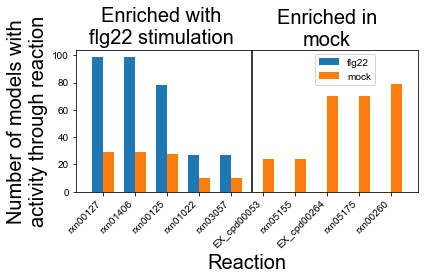

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#temp = top_only.copy()
fig, ax = plt.subplots()
labels = top_only.index.tolist()
labels = [label[:-2] for label in labels] # remove compartment suffix
x = np.arange(len(labels))
width = 0.35

flg_bar = ax.bar(x - width/2, height=top_only['flg'], width = width, label = 'flg22')
mock_bar = ax.bar(x + width/2, height=top_only['mock'], width = width, label = 'mock')

# add a line mid-way through the plotting area to represent the transition from high-flg to high-mock reactions
plt.axvline(x=len(labels)/2 - width, color = 'black')

# Add titles for either side of the plot
ax.set_title('Enriched with\nflg22 stimulation', fontsize=20, loc='center', x = .25)
ax.text(7,107.0,'Enriched in\nmock', size=20,horizontalalignment='center')


ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45, ha='right')

ax.set_xlabel('Reaction',fontsize=20)
ax.set_ylabel('Number of models with\nactivity through reaction',fontsize=20)
ax.legend(loc=(0.7,0.75))

plt.tight_layout()

fig.savefig('../results/figures/gimme_top_open_reactions.svg')
fig.savefig('../results/figures/gimme_top_open_reactions.png')